In [1]:
pip install visualkeras

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization,MaxPooling2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model





# **Loading Data**

In [3]:
train=pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv',sep=',')
test=pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv',sep=',')

In [4]:
train.head(n=3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0


In [5]:
test.head(n=3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0


In [6]:
train.shape

(60000, 785)

In [7]:
test.shape

(10000, 785)

In [8]:
# Check any missing values in the train set
train.isnull().any().sum()

0

In [9]:
# Check any missing values in the test set
train.isnull().any().sum()

0

In [10]:
class_names=["T-shirt",'Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','AnkleBoot']

# **Data visualization**

In [11]:
X_train=train.iloc[:,1:]
label_train=train.iloc[:,0]

X_test=test.iloc[:,1:]
label_test=test.iloc[:,0]

### Images in the train set

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


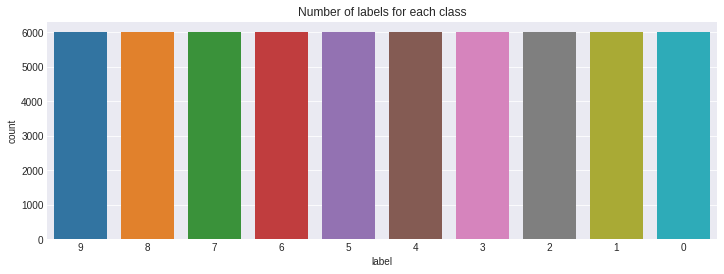

In [12]:
fig,ax=plt.subplots(figsize=(12,4))

f=sns.countplot(label_train,order=label_train.value_counts().index)
f.set_title('Number of labels for each class')

plt.show()

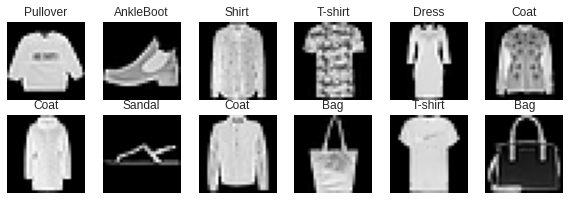

In [13]:
plt.figure(figsize=(10,10))

for i in np.arange(12):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train.loc[i].values.reshape(28,28),cmap='gray')
  label_index=int(label_train[i])
  plt.title(class_names[label_index])

plt.show()

### Image in the test set

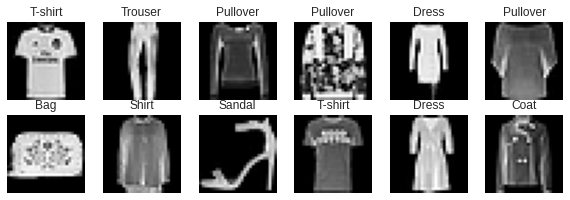

In [14]:
plt.figure(figsize=(10,10))

for i in np.arange(12):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test.loc[i].values.reshape(28,28),cmap='gray')
  label_index=int(label_test[i])
  plt.title(class_names[label_index])

plt.show()

# **Data Preprocessing**

In [15]:
def data_preprocessing(data):
  label=tf.keras.utils.to_categorical(data['label'],10)
  X=data.values[:,1:]
  X=X.reshape(X.shape[0],28,28,1)
  X=X/255.0
  return X,label
  

In [16]:
X_train,Y_train=data_preprocessing(train)
X_test,Y_test=data_preprocessing(test)

In [17]:
#Split the training set into train and val set

x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2)

# **Build the model**

In [48]:
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)       

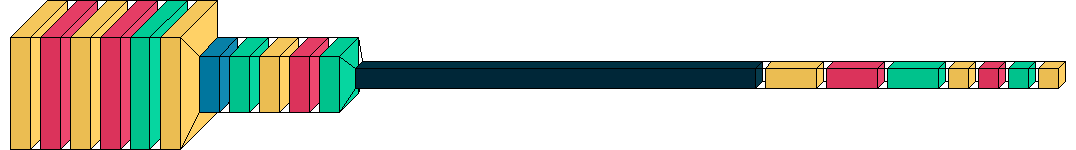

In [50]:
visualkeras.layered_view(model)

# **Modeling with Data augmentation**

In [28]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array
from keras.preprocessing.image import random_rotation, random_shift, random_shear, random_zoom

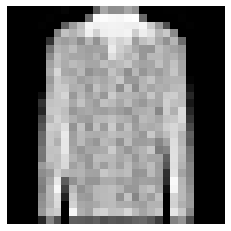

In [30]:
img=test.iloc[16,1:].values.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.axis('off');

### **Shift**

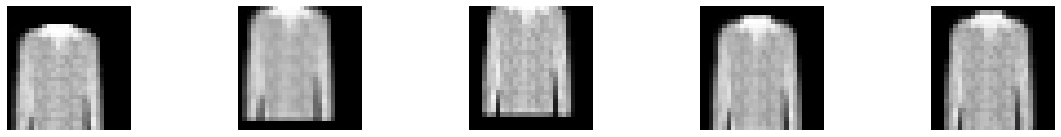

In [31]:
img=img.reshape(28,28,1)
plt.figure(figsize=(20,5))

for i in np.arange(5):
  plt.subplot(2,5,i+1)
  image=random_shift(img,wrg=0.1,hrg=0.2,row_axis=0,col_axis=1,channel_axis=2,fill_mode='constant',cval=0)
  plt.imshow(image.reshape(28,28),cmap='gray')
  plt.axis('off')

plt.show()

### **Rotation**

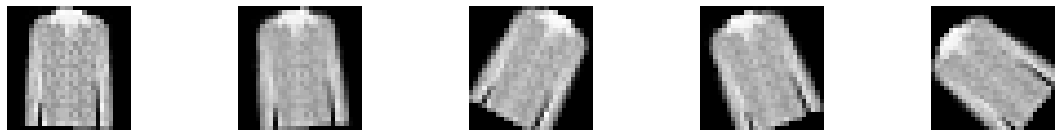

In [32]:
img=img.reshape(28,28,1)
plt.figure(figsize=(20,5))

for i in np.arange(5):
  plt.subplot(2,5,i+1)
  image=random_rotation(img,60,row_axis=0,col_axis=1,channel_axis=2,fill_mode='constant',cval=0)
  plt.imshow(image.reshape(28,28),cmap='gray')
  plt.axis('off')

plt.show()

### **Zoom**

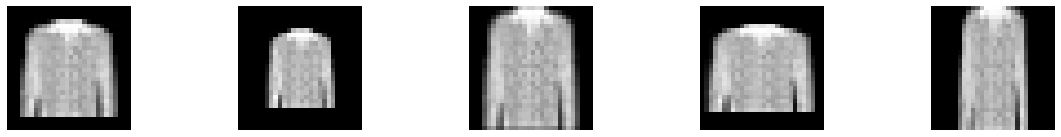

In [34]:
img=img.reshape(28,28,1)
plt.figure(figsize=(20,5))

for i in np.arange(5):
  plt.subplot(2,5,i+1)
  image=random_zoom(img,zoom_range=(0.8,1.5),row_axis=0,col_axis=1,channel_axis=2,fill_mode='constant',cval=0)
  plt.imshow(image.reshape(28,28),cmap='gray')
  plt.axis('off')

plt.show()

### **Combined in the ImageDataGenerator**

In [36]:
dataGen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.2,
                             shear_range=0.5,
                             zoom_range=(0.8,1.5),
                             fill_mode='constant',
                             cval=0)

In [37]:
visu=dataGen.flow(x_train,batch_size=36)

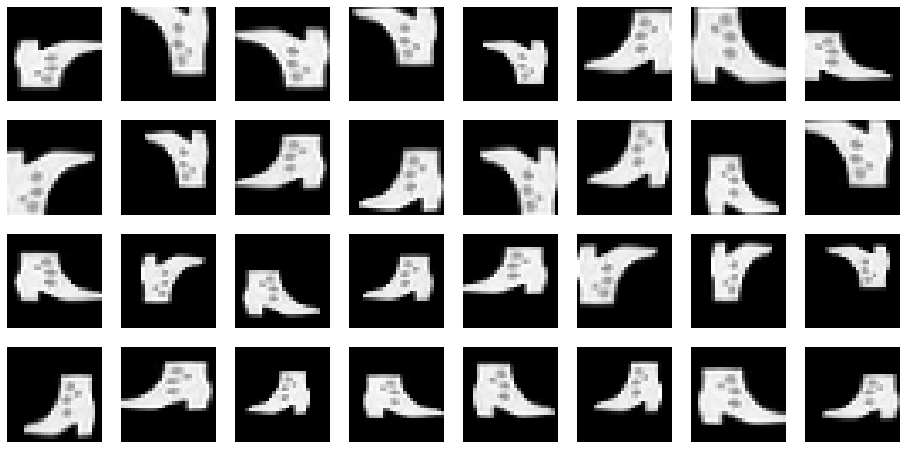

In [122]:
plt.figure(figsize=(16,8))
for i in np.arange(32):
  v=visu[0][0].reshape(28,28)
  plt.subplot(4,8,i+1)
  plt.imshow(v,cmap='gray')
  plt.axis('off')


# **Fit the model**

In [52]:
Model_data_gen=model.fit_generator(datagen.flow(x_train,y_train),steps_per_epoch=x_train.shape[0]/128,epochs=50,validation_data=(x_val,y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
375/375 [==============================] - 6s 16ms/step - loss: 0.7833 - accuracy: 0.7283 - val_loss: 0.3556 - val_accuracy: 0.8753
Epoch 2/50
375/375 [==============================] - 6s 15ms/step - loss: 0.5623 - accuracy: 0.7908 - val_loss: 0.3638 - val_accuracy: 0.8707
Epoch 3/50
375/375 [==============================] - 6s 15ms/step - loss: 0.5344 - accuracy: 0.8104 - val_loss: 0.3322 - val_accuracy: 0.8808
Epoch 4/50
375/375 [==============================] - 6s 15ms/step - loss: 0.4978 - accuracy: 0.8231 - val_loss: 0.3080 - val_accuracy: 0.8920
Epoch 5/50
375/375 [==============================] - 6s 15ms/step - loss: 0.4675 - accuracy: 0.8296 - val_loss: 0.3120 - val_accuracy: 0.8884
Epoch 6/50
375/375 [==============================] - 6s 15ms/step - loss: 0.4842 - accuracy: 0.8256 - val_loss: 0.3061 - val_accuracy: 0.8906
Epoch 7/50
375/375 [==============================] - 6s 15ms/step - loss: 0.4529 - accuracy: 0.8396 - val_loss: 0.2793 - val_accuracy: 0.8986

# **Evaluate model performances**

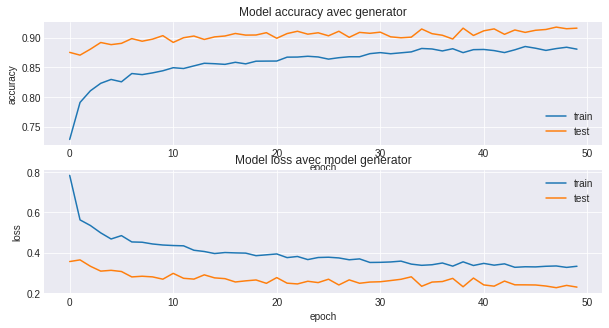

In [58]:
#Summararize history for accuracy

fig,ax=plt.subplots(figsize=(10,5),ncols=1,nrows=2)

ax[0].plot(Model_data_gen.history['accuracy'])
ax[0].plot(Model_data_gen.history['val_accuracy'])
ax[0].set_title('Model accuracy avec generator')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train','test'],loc='best')

ax[1].plot(Model_data_gen.history['loss'])
ax[1].plot(Model_data_gen.history['val_loss'])
ax[1].set_title('Model loss avec model generator')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(['train','test'],loc='best')

In [61]:
#Peformances
score = model.evaluate(X_test, Y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2153 - accuracy: 0.9201
Loss: 0.2153
Accuracy: 0.9201


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


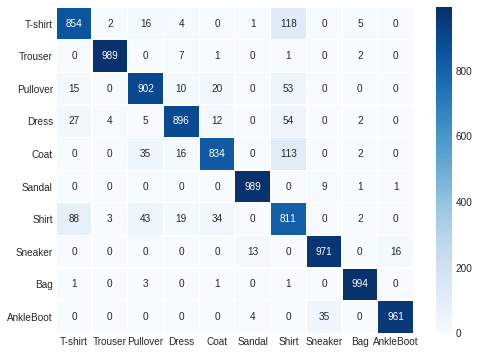

In [68]:
pred=model.predict_classes(X_test)

#Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(label_test,pred),
            annot=True,
            fmt='1',
            cmap='Blues',
            linewidths=0.2,
            xticklabels=class_names, yticklabels=class_names)


In [69]:
#Classification report 
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.90      0.90      1000
           3       0.94      0.90      0.92      1000
           4       0.92      0.83      0.88      1000
           5       0.98      0.99      0.99      1000
           6       0.70      0.81      0.75      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# **Visualization of predictions**

In [73]:
correct=[]
for i in np.arange(label_test.shape[0]):
  if label_test[i]==pred[i]:
    correct.append(i)
  if len(correct)>5:
    break

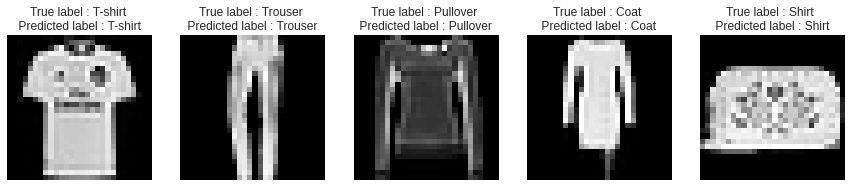

In [115]:
plt.figure(figsize=(15,25))
for i in np.arange(5):
  plt.subplot(150+(i+1))
  plt.imshow(X_test[correct[i]].reshape(28,28),cmap='gray')
  plt.title("True label : {} \n Predicted label : {} ".format(str(class_names[correct[i]]),str(class_names[correct[i]])))
  plt.axis('off')

In [107]:
uncorrect=[]
for i in np.arange(label_test.shape[0]):
  if label_test[i]!=pred[i]:
    uncorrect.append(i)
  if len(uncorrect)>5:
    break

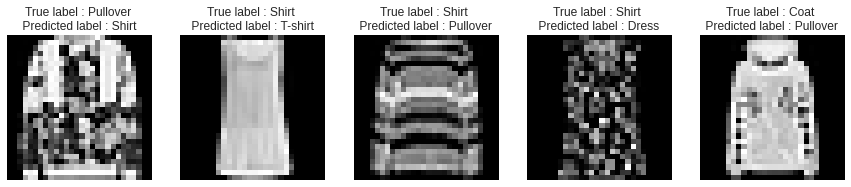

In [116]:
plt.figure(figsize=(15,25))
for i in np.arange(5):
  plt.subplot(5,5,(i+1))
  plt.imshow(X_test[uncorrect[-i]].reshape(28,28),cmap='gray')
  plt.title("True label : {} \n Predicted label : {} ".format(str(class_names[label_test[uncorrect[-i]]]),str(class_names[pred[uncorrect[-i]]])))
  plt.axis('off')

In [118]:
print("Final accuracy : {}".format(accuracy_score(label_test,pred)*100),"%")

Final accuracy : 92.01 %
